In [5]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install --upgrade us matplotlib seaborn numpy pandas

  Using cached https://files.pythonhosted.org/packages/72/83/8731cbf5afcf3434c0b24cfc520c11fd27bfc8a6878114662f4e3dbdab71/us-1.0.0.tar.gz
    100% |████████████████████████████████| 14.1MB 1.5MB/s ta 0:00:011
    100% |████████████████████████████████| 215kB 10.0MB/s ta 0:00:01
    100% |████████████████████████████████| 24.5MB 798kB/s ta 0:00:011   28% |█████████▎                      | 7.1MB 13.4MB/s eta 0:00:02
    100% |████████████████████████████████| 14.7MB 1.9MB/s ta 0:00:011    86% |███████████████████████████▌    | 12.6MB 7.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/94/48/ddb1458d966f0a84e472d059d87a9d1527df7768a725132fc1d810728386/jellyfish-0.5.6.tar.gz
Requirement not upgraded as not directly required: python-dateutil>=2.1 in /Users/Edward/.pyenv/versions/3.6.5/lib/python3.6/site-packages (from matplotlib) (2.7.3)
Requirement not upgraded as not directly required: kiwisolver>=1.0.1 in /Users/Edward/.pyenv/versions/3.6.5/lib/python3.6/site-packa

In [7]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /anaconda3/lib/python3.5/site-packages (18.1)


In [12]:
# Inline Chart Parameters
%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Python Imports
import pandas as pd
import numpy as np
import us
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [5]:
pres_results = pd.read_csv('pres_results.csv')
pres_results.head()

,year,state,dem,rep
0,2016,AK,41.6,58.4
1,2016,AL,35.6,64.4
2,2016,AR,35.7,64.3
3,2016,AZ,48.1,51.9
4,2016,CA,66.1,33.9


In [43]:
pres_results['d_margin'] = pres_results.dem - pres_results.rep
pres_results['r_margin'] = pres_results.rep - pres_results.dem

pres_results_national = pres_results[pres_results.state == 'US']
pres_results_by_state = pres_results[~pres_results.state.isin(['DC','US'])]

pres_results_national.head()

,year,state,dem,rep,d_margin,r_margin
44,2016,US,51.1,48.9,2.2,-2.2
96,2012,US,52.0,48.0,4.0,-4.0
148,2008,US,53.7,46.3,7.4,-7.4
200,2004,US,48.8,51.2,-2.4,2.4
252,2000,US,50.3,49.7,0.6,-0.6


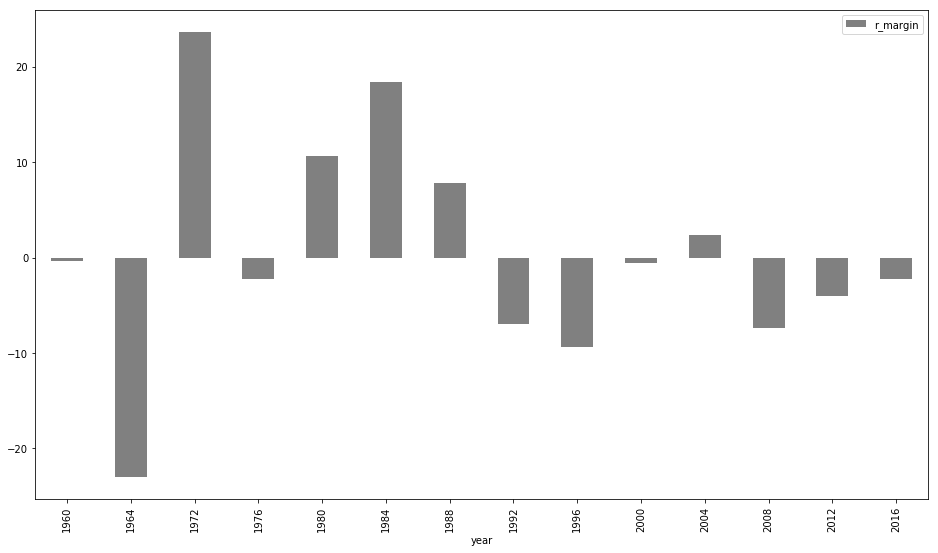

In [44]:
pres_results_national.sort_values(by='year').plot(x='year', y='r_margin', kind='bar', color='gray')

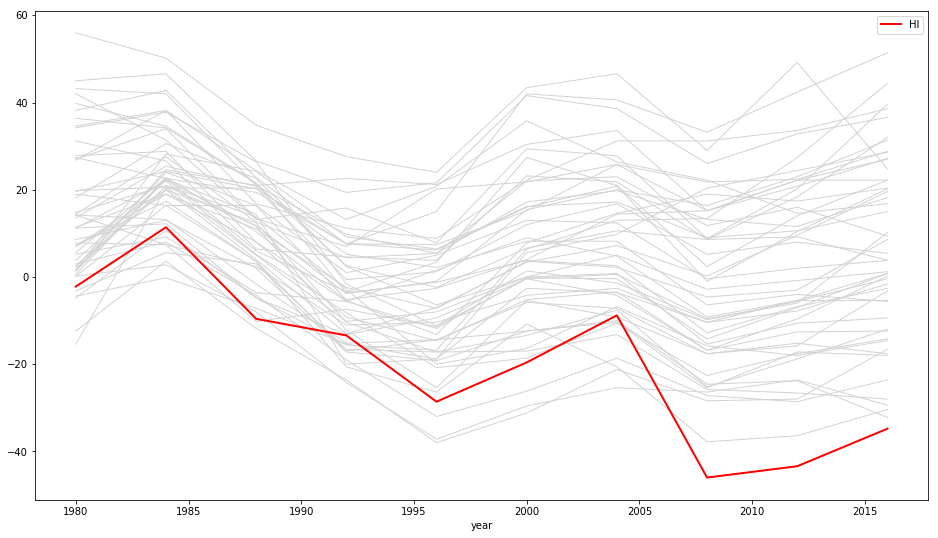

In [46]:
fig, ax = plt.subplots()
pres_results_by_state[pres_results_by_state.year>=1980].groupby('state').plot(
    x='year', y='r_margin', c='lightgray', kind='line', ax=ax, legend=False, linewidth=1)
pres_results_by_state[(pres_results_by_state.year>=1980)&(pres_results_by_state.state=='HI')].plot(
    x='year', y='r_margin', c='red', kind='line', ax=ax, label='HI', linewidth=2)

In [31]:
# get the 2016 results and sort them by d_margin
pres_results_by_state[pres_results_by_state.year==2016].sort_values('d_margin', ascending=False).head()

,year,state,dem,rep,d_margin
11,2016,HI,67.4,32.6,34.8
4,2016,CA,66.1,33.9,32.2
47,2016,VT,65.2,34.8,30.4
19,2016,MA,64.7,35.3,29.4
20,2016,MD,64.0,36.0,28.0


In [39]:
df = pres_results_by_state

df['previous_year'] = df.year - 4

df = pd.merge(
    df, 
    pres_results_by_state[['year','state','rep', 'dem']],
    how='left', left_on=('previous_year', 'state'), right_on=('year', 'state'), suffixes=('','_previous_year'))

df = pd.merge(
    df, 
    pres_results_national[['year','rep', 'dem']],
    how='left', on='year', suffixes=('','_national'))

df = pd.merge(
    df, 
    pres_results_national[['year','rep', 'dem']],
    how='left', left_on='previous_year', right_on='year', suffixes=('','_previous_year_national'))

del df['year_previous_year_national']
del df['year_previous_year']

df['pvi'] = (df['rep'] * .5 + df['rep_previous_year'] * .5 ) - (df['rep_national'] *.5 + df['rep_previous_year_national'] * .5)
df['fte_pvi'] = (df['rep'] * .75 + df['rep_previous_year'] * .25 ) - (df['rep_national'] *.75 + df['rep_previous_year_national'] * .25)

df = df[df.year>=1980]

df.head()

,year,state,dem,rep,d_margin,previous_year,rep_previous_year,dem_previous_year,rep_national,dem_national,rep_previous_year_national,dem_previous_year_national,pvi,fte_pvi
0,2016,AK,41.6,58.4,-16.8,2012,57.3,42.7,48.9,51.1,48.0,52.0,9.40,9.450
1,2016,AL,35.6,64.4,-28.8,2012,61.2,38.8,48.9,51.1,48.0,52.0,14.35,14.925
2,2016,AR,35.7,64.3,-28.6,2012,62.2,37.8,48.9,51.1,48.0,52.0,14.80,15.100
3,2016,AZ,48.1,51.9,-3.8,2012,54.6,45.4,48.9,51.1,48.0,52.0,4.80,3.900
4,2016,CA,66.1,33.9,32.2,2012,38.1,61.9,48.9,51.1,48.0,52.0,-12.45,-13.725


In [42]:
# get the 2016 results and sort them by d_margin
df[df['year']==2016].sort_values('pvi', ascending=False).head()

,year,state,dem,rep,d_margin,previous_year,rep_previous_year,dem_previous_year,rep_national,dem_national,rep_previous_year_national,dem_previous_year_national,pvi,fte_pvi
49,2016,WY,24.3,75.7,-51.4,2012,71.2,28.8,48.9,51.1,48.0,52.0,25.00,25.900
43,2016,UT,37.6,62.4,-24.8,2012,74.6,25.4,48.9,51.1,48.0,52.0,20.05,16.775
35,2016,OK,30.7,69.3,-38.6,2012,66.8,33.2,48.9,51.1,48.0,52.0,19.60,20.000
48,2016,WV,27.8,72.2,-44.4,2012,63.7,36.3,48.9,51.1,48.0,52.0,19.50,21.400
12,2016,ID,31.7,68.3,-36.6,2012,66.4,33.6,48.9,51.1,48.0,52.0,18.90,19.150


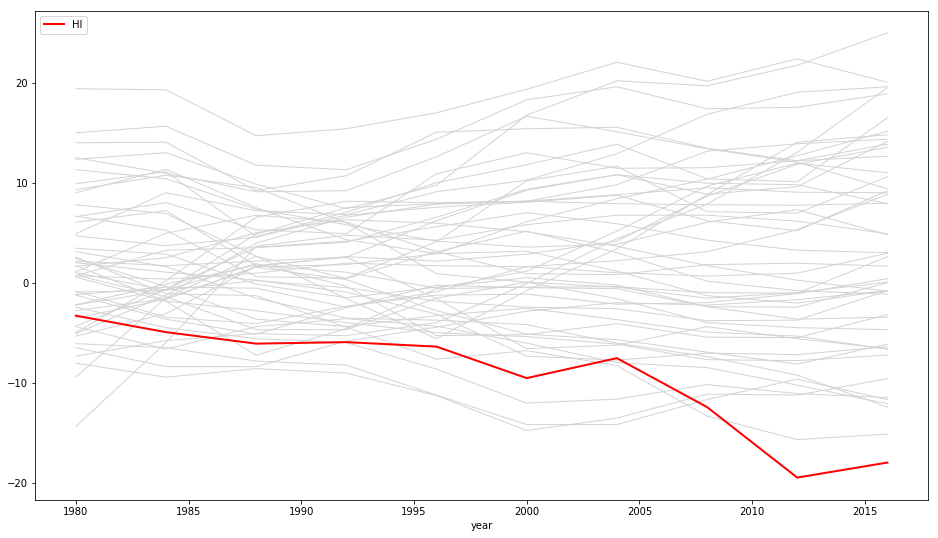

In [47]:
fig, ax = plt.subplots()
df.groupby('state').plot(
    x='year', y='pvi', c='lightgray', kind='line', ax=ax, legend=False, linewidth=1)
df[df.state=='HI'].plot(
    x='year', y='pvi', c='red', kind='line', ax=ax, label='HI', linewidth=2)

Note: A lot of Dave Leip's data is available on Harvard's Dataverse (Columbia students have free access to it).